In [1]:
import numpy as np
from keras import datasets, models, layers
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
%matplotlib inline
import seaborn as sns; sns.set()


Using TensorFlow backend.
/Users/ahmed/opt/anaconda3/envs/new2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/ahmed/opt/anaconda3/envs/new2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/ahmed/opt/anaconda3/envs/new2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/ahmed/o

#  Load data & prepare the data

In [2]:
df = pd.read_csv('spambase.data', header=None)

In [3]:
df.shape

(4601, 58)

In [4]:
df.iloc[:, -1].value_counts()

0    2788
1    1813
Name: 57, dtype: int64

In [5]:
def load_spam_data ():

  df = pd.read_csv('spambase.data', header=None)

  # train test split

  np.random.seed(42)                                                               
  ind_train_class_0 = np.random.choice(df[df.iloc[:,-1]==0].index, 1500, replace=False) 
  ind_train_class_1 = np.random.choice(df[df.iloc[:,-1]==1].index, 1500, replace=False) 
  ind_train = []                                                                      
  [ind_train.append(i) for i in ind_train_class_0]                                   
  [ind_train.append(i) for i in ind_train_class_1]                                    
  train_data = df.iloc[ind_train,:-1]                                                   
  train_target = df.iloc[ind_train,-1]                                                  
  train_target.value_counts()

  # the rest will be use for testing
  ind_test = []
  [ind_test.append(i) for i in df.index if (i not in ind_train)]
  test_data = df.iloc[ind_test,:-1]
  test_target = df.iloc[ind_test,-1]

  train_data, test_data, train_target, test_target = train_data.to_numpy() , test_data.to_numpy(), train_target.to_numpy(), test_target.to_numpy()

  # normalize
  mean = train_data.mean(axis=0)
  train_data -= mean
  std = train_data.std(axis=0)
  train_data /= std

  test_data -= mean
  test_data /= std

  return (train_data, train_target) , (test_data, test_target)

In [6]:
(train_data, train_target) , (test_data, test_target) = load_spam_data()

In [7]:
train_data.shape

(3000, 57)

In [8]:
# Create validation set
np.random.seed(42)
ind_Validation_class_0 = np.random.choice(np.where(train_target == 0)[0], 300, replace=False)
ind_Validation_class_1 = np.random.choice(np.where(train_target == 1)[0], 300, replace=False)
ind_Validation = []
s = [ind_Validation.append(i) for i in ind_Validation_class_0]
s = [ind_Validation.append(i) for i in ind_Validation_class_1]
len(ind_Validation)

600

In [9]:
# Validation set
x_Validation = train_data[ind_Validation]
y_Validation = train_target[ind_Validation]
# training set
train_ind = []
s = [train_ind.append(i) for i in np.where(train_target == 0)[0] if i not in ind_Validation]
s = [train_ind.append(i) for i in np.where(train_target == 1)[0] if i not in ind_Validation]
x_train = train_data[train_ind]
y_train = train_target[train_ind]
len(y_train)

2400

In [10]:
sum(y_train)

1200

# Model and evaluation

In [11]:
model = models.Sequential()
model.add(layers.Dense(26, activation='relu', input_shape=(57,)))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
history = model.fit(x_train, y_train, epochs=200, validation_data = (x_Validation, y_Validation), batch_size=200)


2021-12-05 18:50:20.284448: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


Train on 2400 samples, validate on 600 samples
Epoch 1/200
2400/2400 [==============================] - 0s 113us/step - loss: 0.7215 - accuracy: 0.5875 - val_loss: 0.6830 - val_accuracy: 0.6250
Epoch 2/200
2400/2400 [==============================] - 0s 15us/step - loss: 0.6037 - accuracy: 0.6854 - val_loss: 0.5803 - val_accuracy: 0.7017
Epoch 3/200
2400/2400 [==============================] - 0s 17us/step - loss: 0.5228 - accuracy: 0.7608 - val_loss: 0.5095 - val_accuracy: 0.7567
Epoch 4/200
2400/2400 [==============================] - 0s 14us/step - loss: 0.4669 - accuracy: 0.8050 - val_loss: 0.4584 - val_accuracy: 0.8067
Epoch 5/200
2400/2400 [==============================] - 0s 16us/step - loss: 0.4263 - accuracy: 0.8396 - val_loss: 0.4201 - val_accuracy: 0.8400
Epoch 6/200
2400/2400 [==============================] - 0s 13us/step - loss: 0.3942 - accuracy: 0.8562 - val_loss: 0.3902 - val_accuracy: 0.8550
Epoch 7/200
2400/2400 [==============================] - 0s 16us/step - loss

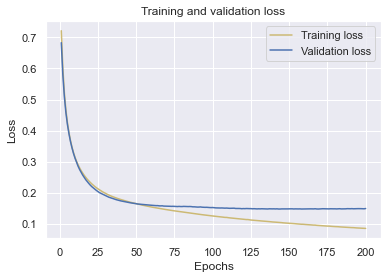

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs,loss, 'y', label='Training loss')
plt.plot(epochs,val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

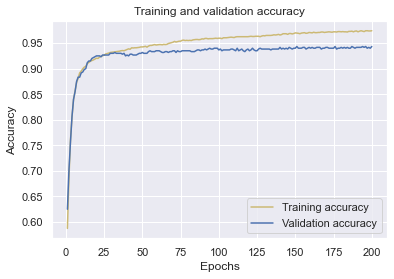

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs,acc, 'y', label='Training accuracy')
plt.plot(epochs,val_acc, 'b', label='Validation accuracy') 
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()